# Q-learning Hyperparameters

Lets analyze how Q-learning responds to changes in hyperparameters. Here we will focus in the learning rate $\alpha$ and the exploration rate $\epsilon$, and will try to compare results in multiple worlds. We will consider the online performance of the alforithm as our objective, in the sense of how many steps the agent takes to complete each run.

We will consider the average results of training rounds consisting of 200 episodes, which are more then enough for the agent to find a good(not necessarily optimal though) police. We will also look at the performance on the final 10 episodes, since they should indicate how well the agent would perform if it needed to continue doing this task. 

This target is a little strange for q-learning, since it's an off-policy learning algorithm. Strictly speaking q-learning is not trying to optimize online performance, but rather to find an optimal greedy police. So a more well suited target could be how long it takes to find such police; this is how ever also a little weird(for instance should we wait untill the greedy police is optimal everywhere or only until it finds an optimal path), and not that easy to check and implement. For this reason we will stick to our target.

Our goal is not to explore these values in great depth, but rather just to get a good idea of what should be good ranges for our problem. It is also not even clear that there are such great values, since they could change from world to world. So we will look at some different worlds to get a general idea. 

Since our target doesn't depend on rewards and the decay rate $\gamma$ we could also treat these as hyperparameters, however we will delay this analyses for a dedicated notebook.

In [1]:
import sys

sys.path.append("../../..")

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time

from grid_world.action import Action
from grid_world.grid_world import GridWorld
from grid_world.agents.q_agent import QAgent
from grid_world.visualization.format_objects import (
    get_policy_rec_str,
    get_policy_eval_str,
    get_world_str,
)
from grid_world.utils.returns import returns_from_reward
from grid_world.utils.policy import get_policy_rec, get_random_policy, sample_action
from notebooks.utils.experimentation import get_exp_results, get_results
from notebooks.utils.worlds import small_world_01, small_world_02, medium_world_01, large_world_01
from notebooks.utils.basics import basic_actions, basic_reward

np.random.seed(13)

## Medium World

We will start by exploring results in a medium sized world. 

In [2]:
training_rounds=10
episodes=200

print(get_world_str(medium_world_01))

5             █  █  ✘ 

4    █                

3    █     █  █  █    

2    █     ☠          

1    █     ☠     ☠    

0 ⚐              ☠    

  0  1  2  3  4  5  6 


In [3]:
base_arguments = {'world': medium_world_01, 'reward_function': basic_reward, 'actions': basic_actions}
# arguments = {'alpha': [0.1, 0.3, 1, 3], 'epsilon': [0.001, 0.003, 0.01, 0.03, 0.1]}
arguments = {'alpha': [0.1, 0.3, 0.7, 1], 'epsilon': [0.0003, 0.001, 0.003, 0.01, 0.03]}

results = get_exp_results(QAgent, base_arguments, arguments, episodes, training_rounds) 

average_lengths_l10 = {key: (np.mean(results[key][0][-10:]))for key in results}
average_lengths = {key: (np.mean(results[key][0]))for key in results}

print("Average length on training rounds")
for k, v in sorted(average_lengths.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

print("\nAverage length on last 10 episodes")
for k, v in sorted(average_lengths_l10.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

Average length on training rounds
{'alpha': 1, 'epsilon': 0.0003}: -27.84
{'alpha': 1, 'epsilon': 0.001}: -28.01
{'alpha': 1, 'epsilon': 0.003}: -28.13
{'alpha': 1, 'epsilon': 0.01}: -28.69
{'alpha': 0.7, 'epsilon': 0.0003}: -28.78
{'alpha': 0.7, 'epsilon': 0.001}: -28.95
{'alpha': 0.7, 'epsilon': 0.003}: -29.33
{'alpha': 0.7, 'epsilon': 0.01}: -30.05
{'alpha': 1, 'epsilon': 0.03}: -30.36
{'alpha': 0.7, 'epsilon': 0.03}: -31.81
{'alpha': 0.3, 'epsilon': 0.0003}: -33.94
{'alpha': 0.3, 'epsilon': 0.001}: -34.11
{'alpha': 0.3, 'epsilon': 0.003}: -34.75
{'alpha': 0.3, 'epsilon': 0.01}: -35.64
{'alpha': 0.3, 'epsilon': 0.03}: -39.12
{'alpha': 0.1, 'epsilon': 0.001}: -66.81
{'alpha': 0.1, 'epsilon': 0.0003}: -67.01
{'alpha': 0.1, 'epsilon': 0.003}: -67.09
{'alpha': 0.1, 'epsilon': 0.01}: -67.65
{'alpha': 0.1, 'epsilon': 0.03}: -69.43

Average length on last 10 episodes
{'alpha': 0.3, 'epsilon': 0.001}: -11.00
{'alpha': 0.7, 'epsilon': 0.0003}: -11.00
{'alpha': 0.7, 'epsilon': 0.001}: -11.00


In [4]:
agent = QAgent(
    world=medium_world_01,
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
    alpha=1,
    epsilon=0.001,
)

episode_lengths, episode_returns = agent.train(episodes=200)
pi_r = get_policy_rec(agent.policy, medium_world_01, agent.actions)
print(get_policy_rec_str(pi_r, medium_world_01))

 →  →  ↓  ↓  █  █  ✘ 

 ↑  █  →  →  →  →  ↑ 

 ↑  █  ↑  █  █  █  ↑ 

 ↓  █  ↑  ☠  →  →  ↑ 

 ↑  █  ↑  ☠  ↑  ☠  ↑ 

 →  →  ↑  →  ↑  ☠  ↓ 




# Small Worlds

For simplicity lets restric our search to a smaller set of hyperparameters. These should still be enough to get a good idea of what is goind on.

In [4]:
arguments = {'alpha': [0.3, 0.7, 1], 'epsilon': [0.0003, 0.001, 0.003]}

print(get_world_str(small_world_01))

3               

2          █    

1    █     ☠    

0 ⚐  █        ✘ 

  0  1  2  3  4 


In [5]:
e_arguments = {'world': small_world_01, 'reward_function': basic_reward, 'actions': basic_actions}

results = get_exp_results(QAgent, base_arguments, arguments, episodes, training_rounds) 

average_lengths_l10 = {key: (np.mean(results[key][0][-10:]))for key in results}
average_lengths = {key: (np.mean(results[key][0]))for key in results}

print("Average training rounds length")
for k, v in sorted(average_lengths.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

print("\nAverage length on last 10 episodes")
for k, v in sorted(average_lengths_l10.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

Average training rounds length
{'alpha': 1, 'epsilon': 0.0003}: -27.90
{'alpha': 1, 'epsilon': 0.001}: -27.95
{'alpha': 1, 'epsilon': 0.003}: -28.04
{'alpha': 0.7, 'epsilon': 0.0003}: -28.78
{'alpha': 0.7, 'epsilon': 0.001}: -28.79
{'alpha': 0.7, 'epsilon': 0.003}: -28.92
{'alpha': 0.3, 'epsilon': 0.001}: -34.00
{'alpha': 0.3, 'epsilon': 0.0003}: -34.03
{'alpha': 0.3, 'epsilon': 0.003}: -34.12

Average length on last 10 episodes
{'alpha': 0.3, 'epsilon': 0.0003}: -11.00
{'alpha': 0.7, 'epsilon': 0.0003}: -11.00
{'alpha': 1, 'epsilon': 0.003}: -11.01
{'alpha': 0.3, 'epsilon': 0.001}: -11.02
{'alpha': 1, 'epsilon': 0.0003}: -11.02
{'alpha': 1, 'epsilon': 0.001}: -11.02
{'alpha': 0.7, 'epsilon': 0.001}: -11.03
{'alpha': 0.7, 'epsilon': 0.003}: -11.04
{'alpha': 0.3, 'epsilon': 0.003}: -11.05


In [6]:
print(get_world_str(small_world_02))

4               

3          █    

2          █    

1    █     ☠  ✘ 

0 ⚐  █          

  0  1  2  3  4 


In [7]:
e_arguments = {'world': small_world_02, 'reward_function': basic_reward, 'actions': basic_actions}

results = get_exp_results(QAgent, base_arguments, arguments, episodes, training_rounds) 

average_lengths_l10 = {key: (np.mean(results[key][0][-10:]))for key in results}
average_lengths = {key: (np.mean(results[key][0]))for key in results}

print("Average training rounds length")
for k, v in sorted(average_lengths.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

print("\nAverage length on last 10 episodes")
for k, v in sorted(average_lengths_l10.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

Average training rounds length
{'alpha': 1, 'epsilon': 0.0003}: -27.85
{'alpha': 1, 'epsilon': 0.001}: -27.89
{'alpha': 1, 'epsilon': 0.003}: -27.97
{'alpha': 0.7, 'epsilon': 0.0003}: -28.84
{'alpha': 0.7, 'epsilon': 0.001}: -28.88
{'alpha': 0.7, 'epsilon': 0.003}: -28.97
{'alpha': 0.3, 'epsilon': 0.001}: -33.89
{'alpha': 0.3, 'epsilon': 0.0003}: -34.00
{'alpha': 0.3, 'epsilon': 0.003}: -34.22

Average length on last 10 episodes
{'alpha': 0.7, 'epsilon': 0.0003}: -11.00
{'alpha': 0.7, 'epsilon': 0.001}: -11.00
{'alpha': 1, 'epsilon': 0.001}: -11.00
{'alpha': 1, 'epsilon': 0.003}: -11.00
{'alpha': 0.3, 'epsilon': 0.0003}: -11.02
{'alpha': 1, 'epsilon': 0.0003}: -11.03
{'alpha': 0.3, 'epsilon': 0.001}: -11.04
{'alpha': 0.7, 'epsilon': 0.003}: -12.11
{'alpha': 0.3, 'epsilon': 0.003}: -13.13


# Large World

In [8]:
print(get_world_str(large_world_01))

7 █  █  █  █  █                

6                   █  █  █    

5    █  █     █  █  ✘     █    

4                █             

3    █     █  █  █  █     █  █ 

2    █              █          

1    █     ☠  ☠     █        ☠ 

0 ⚐        █                   

  0  1  2  3  4  5  6  7  8  9 


In [9]:
base_arguments = {'world': large_world_01, 'reward_function': basic_reward, 'actions': basic_actions}

results = get_exp_results(QAgent, base_arguments, arguments, episodes, training_rounds) 

average_lengths_l10 = {key: (np.mean(results[key][0][-10:]))for key in results}
average_lengths = {key: (np.mean(results[key][0]))for key in results}

print("Average training rounds length")
for k, v in sorted(average_lengths.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

print("\nAverage length on last 10 episodes")
for k, v in sorted(average_lengths_l10.items(), key=lambda item: item[1], reverse = True):
    print(f"{k}: {v:.2f}")

Average training rounds length
{'alpha': 1, 'epsilon': 0.003}: -38.14
{'alpha': 1, 'epsilon': 0.01}: -39.19
{'alpha': 1, 'epsilon': 0.1}: -57.65
{'alpha': 0.3, 'epsilon': 0.003}: -58.79
{'alpha': 0.3, 'epsilon': 0.01}: -59.56
{'alpha': 0.3, 'epsilon': 0.1}: -78.57
{'alpha': 0.03, 'epsilon': 0.003}: -258.41
{'alpha': 0.03, 'epsilon': 0.01}: -259.65
{'alpha': 0.03, 'epsilon': 0.1}: -282.38

Average length on last 10 episodes
{'alpha': 1, 'epsilon': 0.003}: -17.03
{'alpha': 0.3, 'epsilon': 0.003}: -17.27
{'alpha': 1, 'epsilon': 0.01}: -18.30
{'alpha': 0.3, 'epsilon': 0.01}: -18.35
{'alpha': 1, 'epsilon': 0.1}: -34.76
{'alpha': 0.3, 'epsilon': 0.1}: -40.62
{'alpha': 0.03, 'epsilon': 0.003}: -104.92
{'alpha': 0.03, 'epsilon': 0.1}: -115.69
{'alpha': 0.03, 'epsilon': 0.01}: -125.92


In [10]:
agent = QAgent(
    world=large_world_01,
    reward_function=basic_reward,
    actions=basic_actions,
    gamma=1,
    alpha=1,
    epsilon=0.001,
)

episode_lengths, episode_returns = agent.train(episodes=200)
pi_r = get_policy_rec(agent.policy, large_world_01, agent.actions)
print(get_policy_rec_str(pi_r, large_world_01))

 █  █  █  █  █  →  →  →  →  ↓ 

 ←  →  →  →  →  ↑  █  █  █  ↓ 

 ←  █  █  ←  █  █  ✘  ←  █  ↓ 

 ↑  →  ↓  →  →  █  ↑  ↑  ←  ← 

 ↑  █  ↓  █  █  █  █  ↑  █  █ 

 ←  █  →  →  →  ↓  █  ↑  ←  → 

 ↓  █  ↑  ☠  ☠  ↓  █  ↑  ↑  ☠ 

 →  →  ↑  █  ↓  →  →  ↑  ↑  → 




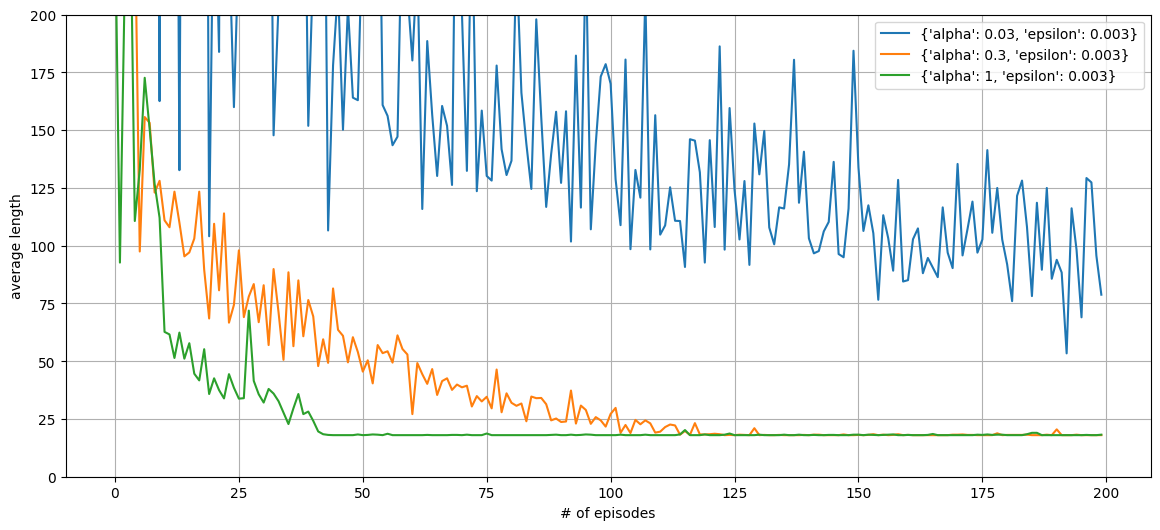

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

for k, v in results.items():
    if "'epsilon': 0.003" in k:
        ax.plot(v[1], label=k)

ax.set(xlabel="# of episodes", ylabel="average length", ylim=[0, 200])
ax.grid()
ax.legend(loc="upper right")
ax.set_title('epsilon = 0.003')

plt.show()

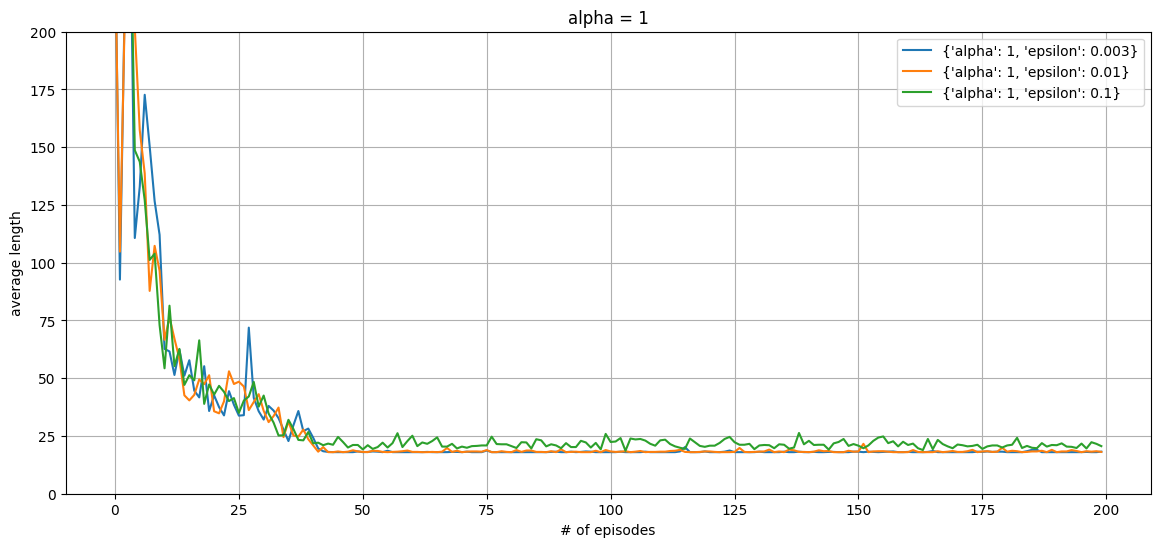

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

for k, v in results.items():
    if "'alpha': 1" in k:
        ax.plot(v[1], label=k)

ax.set(xlabel="# of episodes", ylabel="average length", ylim=[0, 200])
ax.grid()
ax.legend(loc="upper right")
ax.set_title('alpha = 1')

plt.show()